Francis Aguilar    
Angela García    
Gerardo Pineda   

### Link de repositorio 
https://github.com/Gerax5/LAB1-IA/tree/main 

# TASK I

## 1.1
El coeficiente 3w₂ multiplica a X₂, siendo el cambio en la variable dependiente (y), 
por cada unidad de cambio en la variable dependiente X₂. Y la otra variable independiente, X₁, se mantiene constante.

## 2.2
La multicolinealidad es cuando dos o más variables predictoras de la regresión lineal (X₁, X₂, …, Xₚ) 
están altamente correlacionadas entre sí, lo que dificulta que el modelo distinga sus efectos individuales 
sobre las variables dependientes. Si se tienen dos variables X₁ y X₂ que son casi linealmente dependientes, 
como X₂ ≈ 2X₁, el modelo de regresión tendría problemas para identificar qué parte del cambio en y se debe a X₁ y cuál a X₂.

# TASK II

## 2.1

---------------------------------------------------------------------------

Importación de librerías

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
#from RL import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

#cargar los datos
df = pd.read_csv("./Dataset/dataset_phishing.csv")

Normalización de datos

In [22]:
#--------exploracion de datos-----------
# #mostrar las primeras filas del df
# print("mostrar las primeras filas del df")
# print(df.head())

#mostrar las columans
print("mostrar las columas")
print(list(df.columns))

# Para saber si el dataset esta balanceado
print("- - - - - - - BALANCEO - - - - - - -")
print(df["status"].value_counts())

# Obtener tipos de datos
tipos_de_datos = df.dtypes.value_counts()

# Mostrar tipos de datos con nombres de columnas
print("- - - - - - - TIPOS DE DATOS - - - - - - -")
print(tipos_de_datos)

#verificar los valores nulos
print("verificar los valores nulos")
print(df.isnull().sum())

# informacion general del dataframe
print("informacion general del dataframe")
print(df.info())

mostrar las columas
['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks

In [23]:
#--eliminar los valores nulos o llenarlos con la media--
#eliminar filas con valores nulos
df = df.dropna()

#calcular la media solo de las columnas numericas
mean_values = df.select_dtypes(include=[np.number]).mean()

#llenar los valores nulos en las columnas numéricas
df.fillna(mean_values, inplace=True)
          
#eliminar duplicados
df = df.drop_duplicates()

In [24]:
#--convertir los tipos de datos----
# Convirtiendo Columna status a numerica
df["status"] = df["status"].map({"phishing": 1, "legitimate": 0})

# Columna innecesaria porque ya se tiene su longitud
dfProcessed = df.drop('url', axis=1)

print(list(dfProcessed.columns))
nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))


['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

## Regresión Logística sin libreríars 

(9144, 87)
(9144,)
<class 'numpy.ndarray'>


C:\Users\Francis\AppData\Local\Temp\ipykernel_2664\2224873843.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


[ 1.97207104e+00  2.08516178e+02  6.79686859e+01  1.15969757e+00
  6.87879042e+00 -1.20721559e+00  2.71363338e-01  1.13871524e+00
  1.06375914e+00  0.00000000e+00  2.10628418e+00  5.76382217e-01
  3.18659236e-02  3.11139781e-01  1.23903632e+01  5.98152127e-03
  2.25364925e+00  1.16182603e-02  4.25327539e-01  1.60219812e-02
  8.64949062e-03 -1.56163040e+00  7.05356592e-01  4.88778267e-02
  8.90978010e-02  1.73795331e+00  3.51867719e-01  2.13443382e-01
  1.96030068e-03  5.54154717e-03  2.53371711e-01  3.60189221e-01
  1.36268610e-01  4.70518667e+00  1.20419033e+00  1.36503349e-01
  8.76930727e-01 -7.09905946e-04  7.91844886e-01  1.37848094e-02
  1.80684301e+01  3.93363842e+00  6.20793145e+00  1.98282864e+01
  6.27096016e+00  6.30833866e+01  2.85499459e+01  5.42596344e+01
  2.06362550e+01  2.35277920e+01  2.01493751e+01  3.47539067e+00
  4.04718686e-01  3.58903473e-02  4.57792355e-02  1.46311031e-01
  3.74008092e-01 -3.65922087e+02  4.62038622e-02  1.10308826e+00
  0.00000000e+00  1.84746

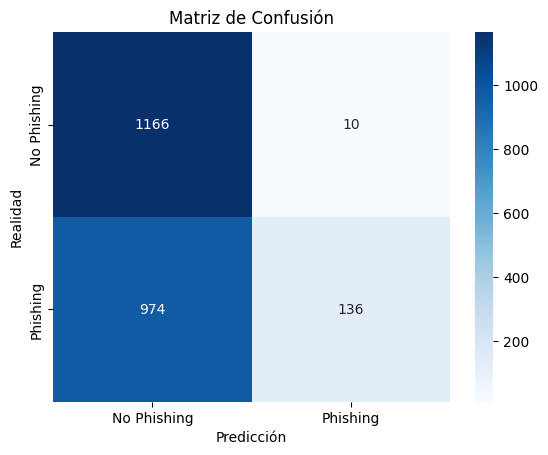

In [25]:
data = dfProcessed
split_index = int(len(data) * 0.8)

X = data.drop("status", axis=1).iloc[:split_index, :]
y = data["status"].iloc[:split_index]

X_test = data.drop("status", axis=1).iloc[split_index:, :]
Y_test = data["status"].iloc[split_index:]

print(X.shape)
print(y.shape)

X = X.values
print(type(X))
y = y.values

# weights
theta = np.zeros(X.shape[1] + 1) # +1 for the bias


# funcion simboidem, en donde z es un vector 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# funcion de perdida 

def cost_function(X, y, theta):
    m = len()
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.T @ np.log(h) + (1-y).T @ np.log(1-h))  
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        X_with_bias = np.hstack([np.ones((m, 1)), X])

        h = sigmoid(X_with_bias @ theta)  # Use X_with_bias for both h and gradient
        gradient = 1/m * X_with_bias.T @ (h - y)  # Calculate gradient with bias
        theta -= alpha * gradient  # Update parameters

    return theta

alpha = 0.01  # Learning rate
iterations = 1800  # Number of iterations

theta = gradient_descent(X, y, theta, alpha, iterations) 
print(theta)

def predict(X, theta):
    """Makes predictions using the trained logistic regression model and returns 1s and 0s."""

    # Add a column of ones to X for the bias term
    X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    z = X_with_bias @ theta  # Calculate predictions with bias

    # Convert boolean results to 1s and 0s using np.where
    predictions = np.where(sigmoid(z) >= 0.5, 1, 0)

    return predictions  # Return the array of 1s and 0s



y_pred = predict(X_test, theta)
cm = confusion_matrix(Y_test, y_pred)
score = accuracy_score(Y_test, y_pred)
print("accuracy score: ", score)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Phishing', 'Phishing'], yticklabels=['No Phishing', 'Phishing'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()


### Parte con librerias 

In [26]:
#clase de RL
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    #convertir la salida lineal del modelo en una probabilidad
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #entrenar el modelo con el conjunto de datos
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = np.array(y).reshape(-1, 1) 
        
        # inicializa con los pesos y el sesgo
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        # GRADIENTE DESCENDIENTE
        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db


    #predecir la salida del modelo para un conjunto de datos
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        
        return (predictions >= 0.5).astype(int) #.astype(int) asegura que sea entero
        

In [27]:
#normalizacion de datos 
#nombre de las columnas numericas a normalizar
numeric_columns = dfProcessed.select_dtypes(include=[np.number]).columns
print(numeric_columns)

#normalizar las columnas
scaler = StandardScaler()

dfProcessed[numeric_columns] = scaler.fit_transform(dfProcessed[numeric_columns])

print(dfProcessed.head())

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [28]:
#---Crear conjuntos de entrenamiento y prueba
X = dfProcessed.drop('status', axis=1)
y = dfProcessed['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model = LogisticRegression(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predecir sobre los datos de prueba
predicciones = model.predict(X_test)
print('predicciones:')
print(predicciones)


# Asegurarse de que y_test sea un vector 1D y tenga valores 0 y 1
y_test = y_test.to_numpy().flatten()
y_test = np.where(y_test == -1, 0, y_test)  # Convertir -1 a 0 



predicciones:
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


In [29]:
#metricas de desempeño
# Calcular la precisión del modelo
print("metricas de desempeño:")

precision = precision_score(y_test, predicciones)
print("Precision:", precision)

accuracy = accuracy_score(y_test, predicciones)
print('accuracy (Exactitud):: ', accuracy)
recall= recall_score(y_test, predicciones)
print('recall (Sensibilidad): ', recall)

f1= f1_score(y_test, predicciones)
print('f1 score: ', f1)
print('el valor de f1 al ser cercano a 1 indica un buen equilibrio entre la presicion y el recall, entonces el modelo tiene un buen rendimiento en estas metricas')

matriz_de_confusion= confusion_matrix(y_test, predicciones)
print(f"Confusion Matrix:\n {matriz_de_confusion}")

metricas de desempeño:
Precision: 0.9631236442516269
accuracy (Exactitud)::  0.8797025371828522
recall (Sensibilidad):  0.7865367581930912
f1 score:  0.8659190638712823
el valor de f1 al ser cercano a 1 indica un buen equilibrio entre la presicion y el recall, entonces el modelo tiene un buen rendimiento en estas metricas
Confusion Matrix:
 [[1123   34]
 [ 241  888]]


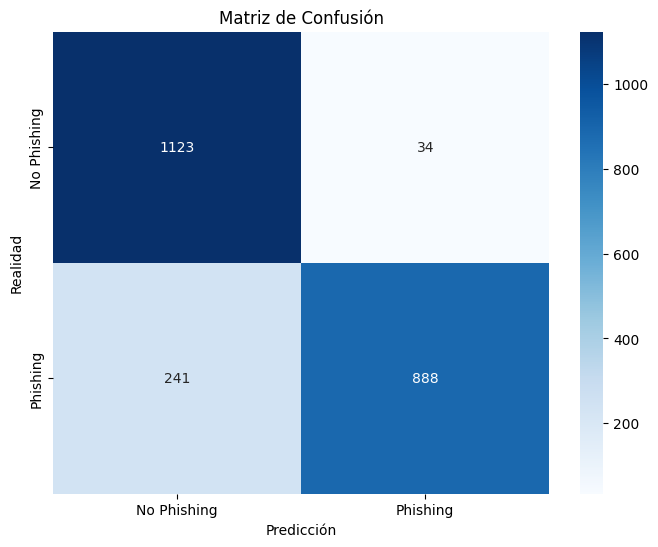

accuracy score:  0.8797025371828522


In [30]:
#Matriz de confusion
#mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_de_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['No Phishing', 'Phishing'], yticklabels=['No Phishing', 'Phishing'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

# Calcular y mostrar el puntaje de exactitud (accuracy)
score = accuracy_score(y_test, predicciones)
print("accuracy score: ", score)

### ¿Cuál implementación fue mejor? ¿Por qué?
La implementación del modelo con las librerias obtuvo un mejor resultado y se puede observar tanto en el accuracy score, como en el las matrices de confusión. Esto se puede dar a que la función del gradiente de la librería está optimizada y mejorada pra presentar datos más acertados, en comparación con la creada desde cero que puede que tenga algunos errores, ya sea de optimización o de control de los datos. También se ven involucrados los learning rates escogidos, ya que esto puede variar el resultado. 

----------------------------------------------------------------------------

## 2.2

In [31]:
import numpy as np
import pandas as pd

df = pd.read_csv("./Dataset/dataset_phishing.csv")

In [32]:
# Exploracion de datos
# Para saber las columnas del dataset
print(list(df.columns))

# Para saber si el dataset esta balanceado
print("- - - - - - - BALANCEO - - - - - - -")
print(df["status"].value_counts())

# Obtener tipos de datos
tipos_de_datos = df.dtypes.value_counts()

# Mostrar tipos de datos con nombres de columnas
print("- - - - - - - TIPOS DE DATOS - - - - - - -")
print(tipos_de_datos)

# Buscando valores nulls
print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df.isnull()
print(nulos)

nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))


['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'rat

In [33]:
# Convirtiendo Columna status a numerica
df["status"] = df["status"].map({"phishing": 1, "legitimate": 0})


# Columna innecesaria porque ya se tiene su longitud
dfProcessed = df.drop('url', axis=1)

print(list(dfProcessed.columns))
nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))


['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

In [34]:
# Este codigo lo dejo aqui porque fue el primer intento del KNN y se tardo demadiado, lo decidi optimizar
# def euclidean(x, y):
#     return np.sqrt(np.sum((x - y) ** 2))

# def Knn(x_train, y_train, x_test, k):
#     y_pred = []
#     for i in range(x_test.shape[0]):
#         distances = []
#         for j in range(x_train.shape[0]):
#             distances.append(euclidean(x_test.iloc[i], x_train.iloc[j]))
#         distances = np.array(distances)
#         k_nearest = np.argsort(distances)[:k]
#         k_nearest_labels = y_train.iloc[k_nearest]
#         y_pred.append(k_nearest_labels.value_counts().idxmax())
#     return y_pred

def Knn_optimized(x_train, y_train, x_test, k):
    y_pred = []
    x_train = x_train.to_numpy() 
    x_test = x_test.to_numpy()

    for x in x_test:
        # Calcular la distancia euclidiana
        distances = np.sqrt(((x_train - x) ** 2).sum(axis=1))

        k_nearest = np.argpartition(distances, k)[:k]
        k_nearest_labels = y_train.iloc[k_nearest]
        y_pred.append(k_nearest_labels.value_counts().idxmax())
    
    return y_pred

# Seleccionar 80% de los datos para entrenamiento
train = dfProcessed.sample(frac=0.8, random_state=42)

# # Usar el resto (20%) para prueba
test = dfProcessed.drop(train.index)

# Train
train_y = train.pop('status')
train_x = train

# Test
test_y = test.pop('status')
test_x = test

y_pred = Knn_optimized(train_x, train_y, test_x, 3)
# print(res)


In [35]:
df_results = pd.DataFrame({'Real': test_y, 'Predicho': y_pred})

y_pred = np.array(y_pred)

TP = np.sum((test_y == 1) & (y_pred == 1))
TN = np.sum((test_y == 0) & (y_pred == 0))
FP = np.sum((test_y == 0) & (y_pred == 1))
FN = np.sum((test_y == 1) & (y_pred == 0))

accuracy = (TP + TN) / len(test_y) if len(test_y) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0

print("Accuracy (Exactitud):", accuracy)
print("Precision (Precisión):", precision)
print("Recall (Sensibilidad):", recall)

Accuracy (Exactitud): 0.8429571303587051
Precision (Precisión): 0.8177257525083612
Recall (Sensibilidad): 0.8739946380697051


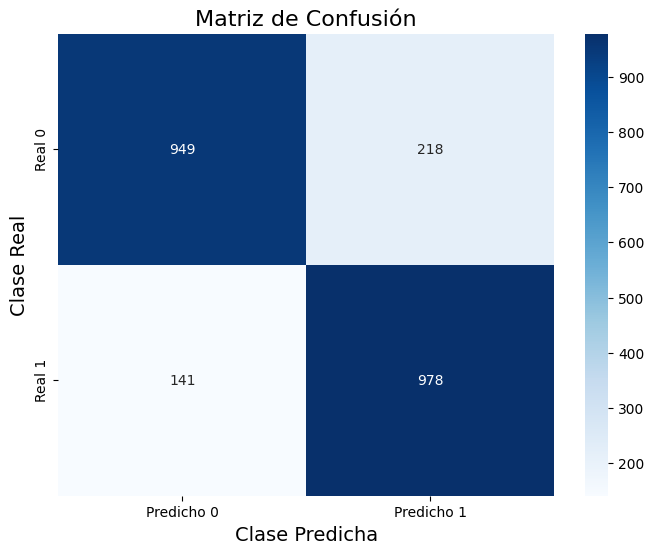

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Valores de la matriz de confusión
conf_matrix = np.array([[TN, FP],  # Primera fila: Verdaderos negativos, Falsos positivos
                        [FN, TP]])  # Segunda fila: Falsos negativos, Verdaderos positivos

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicho 0", "Predicho 1"], yticklabels=["Real 0", "Real 1"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Clase Predicha", fontsize=14)
plt.ylabel("Clase Real", fontsize=14)
plt.show()

In [37]:
df = pd.read_csv("./Dataset/dataset_phishing.csv")

# Convirtiendo Columna status a numerica
df["status"] = df["status"].map({"phishing": 1, "legitimate": 0})


# Columna innecesaria porque ya se tiene su longitud
dfProcessed = df.drop('url', axis=1)

print(list(dfProcessed.columns))
nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))

['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS', 'ratio_intR

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt


y = dfProcessed.pop("status") 
X = dfProcessed


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy (Exactitud):", accuracy)
print("Precision (Precisión):", precision)
print("Recall (Sensibilidad):", recall)

Accuracy (Exactitud): 0.836832895888014
Precision (Precisión): 0.8214285714285714
Recall (Sensibilidad): 0.8556244464127547


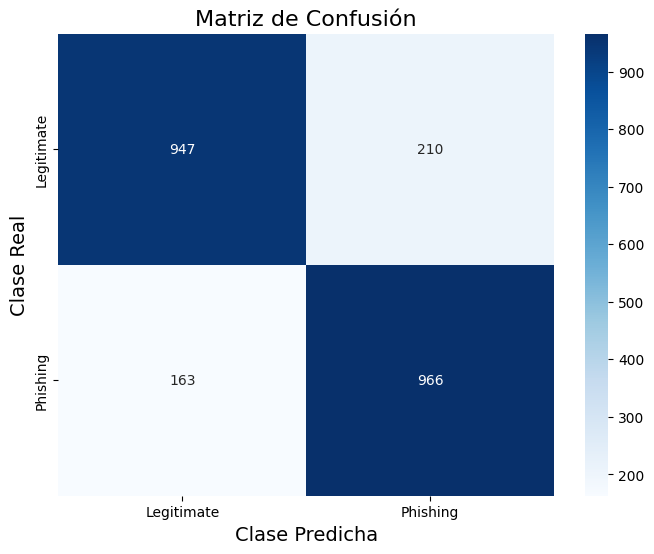

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Phishing"], yticklabels=["Legitimate", "Phishing"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Clase Predicha", fontsize=14)
plt.ylabel("Clase Real", fontsize=14)
plt.show()


### métricas de desempeño 

Las métricas que se usaron para evaluar el modelo fueron las de acurracy porque los datos estaban balanceados, existe la misma cantidad de datos fishing como legitimo. Además, se usó Precisión para saber la precisión en la que devuelve los datos y por último se utilizó la sensibilidad para saber de los positivos reales cuantos fueron identificados. 

### ¿Cuál implementación fue mejor? ¿Por qué? 
Las dos formas de solucionar el problema dieron una respuesta muy parecida, por los resultados el knn de la librería Sckit-learn, es ligeramente mejor al realizado por el grupo. Pero en términos generales son muy parecidos por lo que ambos fueron buenas implementaciones. 